<a href="https://colab.research.google.com/github/AFBA1993/Projects/blob/main/Insights/IfoodCase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Loading data:**

In [2]:
url = ('https://raw.githubusercontent.com/ifood/'
        +'ifood-data-business-analyst-test/master/ml_project1_data.csv')

url_data = requests.get(url).content
raw_data = pd.read_csv(io.StringIO(url_data.decode('utf-8')))

# **Exploring the data:**

In [3]:
raw_data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# Checking and treating missing values:

In [4]:
raw_data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

There are only 24 missing values within the Income feature.

In [5]:
mean_income = raw_data.Income.loc[(raw_data.Income)!= 'NaN'].mean()
mean_income

52247.25135379061

In [6]:
raw_data.Income.fillna(mean_income, inplace = True)

In [7]:
raw_data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

# Verifying if every row correspond to an unique user:

In [8]:
len(raw_data)

2240

In [9]:
raw_data.ID.nunique()

2240

Every row is unique.

# Classifying features into numerical and categorical:

In [10]:
raw_data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

Just creating an Age feature from year o f birth:

In [11]:
data = raw_data

In [12]:
data['Age'] = 2022 - data.Year_Birth
data.drop(['Year_Birth'], axis = 1,  inplace = True)

Returning to the classification process:

In [13]:
categorical_data = raw_data[['Education', 'Marital_Status', 'AcceptedCmp1',
                           'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
                           'AcceptedCmp5', 'Response', 'Complain']]

In [14]:
numerical_data = raw_data[[ 'Age', 'Income', 'Kidhome', 'Teenhome', 'Recency',
                           'MntWines','MntFruits', 'MntMeatProducts', 
                           'MntFishProducts', 'MntSweetProducts',
                           'MntGoldProds', 'NumDealsPurchases', 
                           'NumWebPurchases', 'NumCatalogPurchases',
                           'NumStorePurchases', 'NumWebVisitsMonth',
                           'Z_CostContact', 'Z_Revenue']]

# Statistical information and outliers detection:

In [15]:
numerical_data.describe()

,Age,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0
mean,53.194196,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,3.0,11.0
std,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.0,0.0
min,26.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
25%,45.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,3.0,11.0
50%,52.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,3.0,11.0
75%,63.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,3.0,11.0
max,129.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,3.0,11.0


Strange facts:
- Age: max 129 years
- Income: 666666.
- Mnt of wines: 1493.
- Mnt of meat products: 1725. 

For each feature, the IQR method is going to detect outliers' presence:

In [16]:
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    
    lowerBound=Q1-1.5*IQR
    upperBound=Q1+1.5*IQR
    
    ls=df.index[(df[ft]<lowerBound)|(df[ft]>upperBound)]
    
    return ls

In [17]:
index_outliers = []
for feature in numerical_data.columns:
  index_outliers.extend(outliers(numerical_data, feature))

index_outliers=sorted(index_outliers)
index_outliers=set(index_outliers)
index_outliers=list(index_outliers)

In [18]:
len(index_outliers)/len(data)*100

54.776785714285715

A figure of 54.8% of the data corresponds to outliers, such information should be corroborated and validated from the source. However, in this case they will be kept since they contain essential information for analyses.

In [19]:
outliers_data = data.iloc[index_outliers]
outliers_data.tail(3)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
2041,4974,Graduation,Single,83273.0,1,2,2012-09-25,98,433,89,...,0,0,0,0,0,0,3,11,0,52
2044,4095,Graduation,Married,37150.0,1,0,2012-09-11,80,167,37,...,0,0,0,0,0,0,3,11,0,51
2047,10701,Graduation,Married,65308.0,0,0,2013-09-11,60,713,0,...,0,0,1,1,0,0,3,11,0,49


A data frame named as 'outliers_data' reports the outliliers within the database.

# Analyzing variance to find non useful features:

In [20]:
numerical_data.var()

Age                    1.436179e+02
Income                 6.268913e+08
Kidhome                2.898725e-01
Teenhome               2.965219e-01
Recency                8.388237e+02
MntWines               1.132978e+05
MntFruits              1.581926e+03
MntMeatProducts        5.094743e+04
MntFishProducts        2.984325e+03
MntSweetProducts       1.704080e+03
MntGoldProds           2.721442e+03
NumDealsPurchases      3.733542e+00
NumWebPurchases        7.721252e+00
NumCatalogPurchases    8.544517e+00
NumStorePurchases      1.056873e+01
NumWebVisitsMonth      5.888606e+00
Z_CostContact          0.000000e+00
Z_Revenue              0.000000e+00
dtype: float64

The variance of features 'Z_CostContact' and 'Z_Reveneu' is zero, thus, those variables do not have any statistical importance.

In [21]:
data.drop(['Z_CostContact', 'Z_Revenue'], axis = 1, inplace = True)

In [22]:
numerical_data.drop(['Z_CostContact', 'Z_Revenue'], axis = 1, inplace = True)

# Understanding numerical variables:

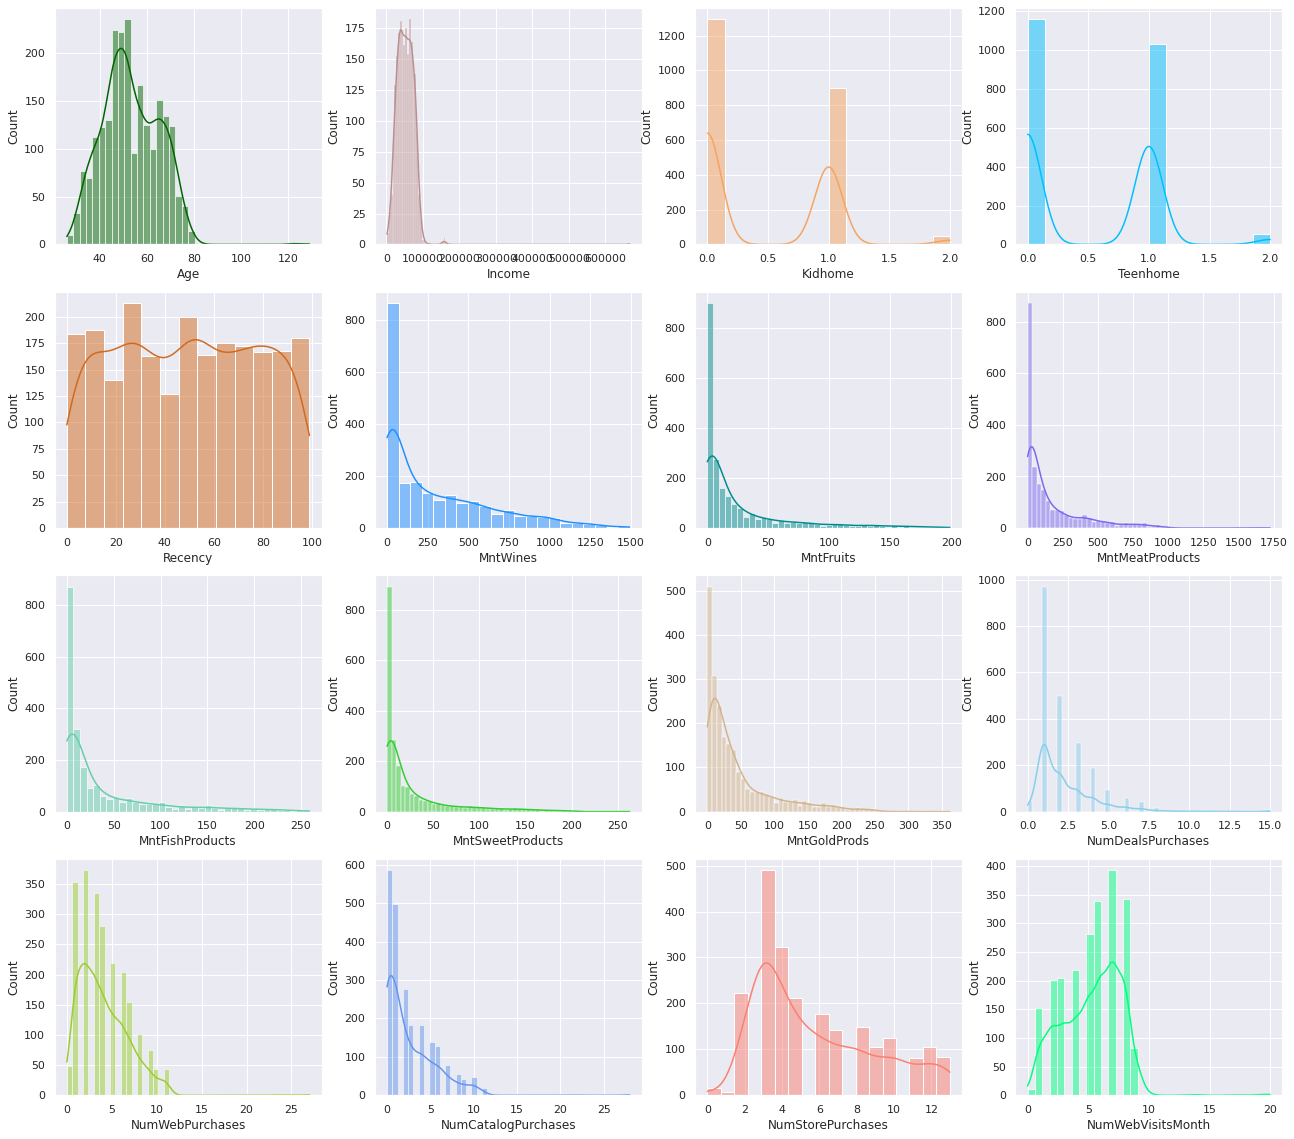

In [23]:
sns.set(style = 'darkgrid')
NUM_COLUMNS = 4
NUM_ROWS = 4
feature_index = 0
COLORS = ['darkgreen', 'rosybrown', 'sandybrown', 'deepskyblue',
          'chocolate', 'dodgerblue', 'darkcyan', 'mediumslateblue',
          'mediumaquamarine', 'limegreen', 'tan', 'skyblue',
          'yellowgreen', 'cornflowerblue', 'salmon', 'springgreen']


fig, axs = plt.subplots(NUM_ROWS, NUM_COLUMNS, figsize=(22, 20))
for j in range(NUM_ROWS):
  for i in range(NUM_COLUMNS):
    sns.histplot(data = numerical_data, 
                 x = numerical_data.columns[feature_index], 
                 kde = True, color = COLORS[feature_index], 
                 ax=axs[j, i])
    feature_index +=1
plt.show()

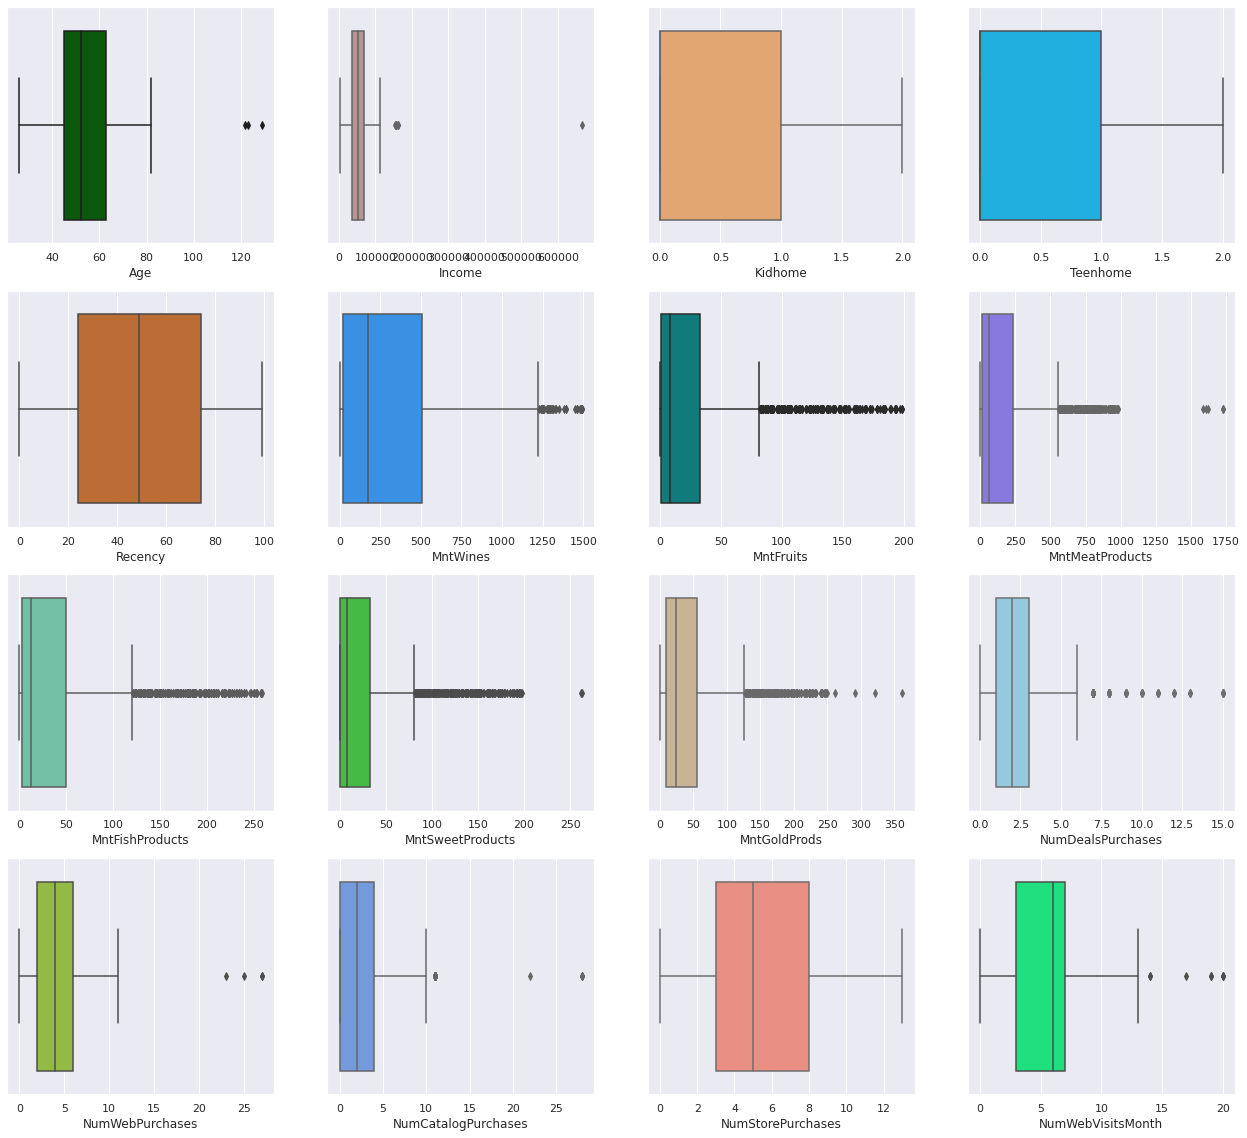

In [24]:
sns.set(style = 'darkgrid')
NUM_COLUMNS = 4
NUM_ROWS = 4
feature_index = 0
COLORS = ['darkgreen', 'rosybrown', 'sandybrown', 'deepskyblue',
          'chocolate', 'dodgerblue', 'darkcyan', 'mediumslateblue',
          'mediumaquamarine', 'limegreen', 'tan', 'skyblue',
          'yellowgreen', 'cornflowerblue', 'salmon', 'springgreen']


fig, axs = plt.subplots(NUM_ROWS, NUM_COLUMNS, figsize=(22, 20))
for j in range(NUM_ROWS):
  for i in range(NUM_COLUMNS):
    sns.boxplot(data = numerical_data, 
                 x = numerical_data.columns[feature_index], 
                 color = COLORS[feature_index], 
                 ax=axs[j, i])
    feature_index +=1
plt.show()

In [25]:
mean_age = data.loc[(data.Age) < 95].Age.mean()
data.Age.loc[(data.Age) > 95] = mean_age

In [26]:
numerical_data.Age.loc[(numerical_data.Age) > 95] = mean_age

# Pearson correlation to avoid linearity in numerical features:

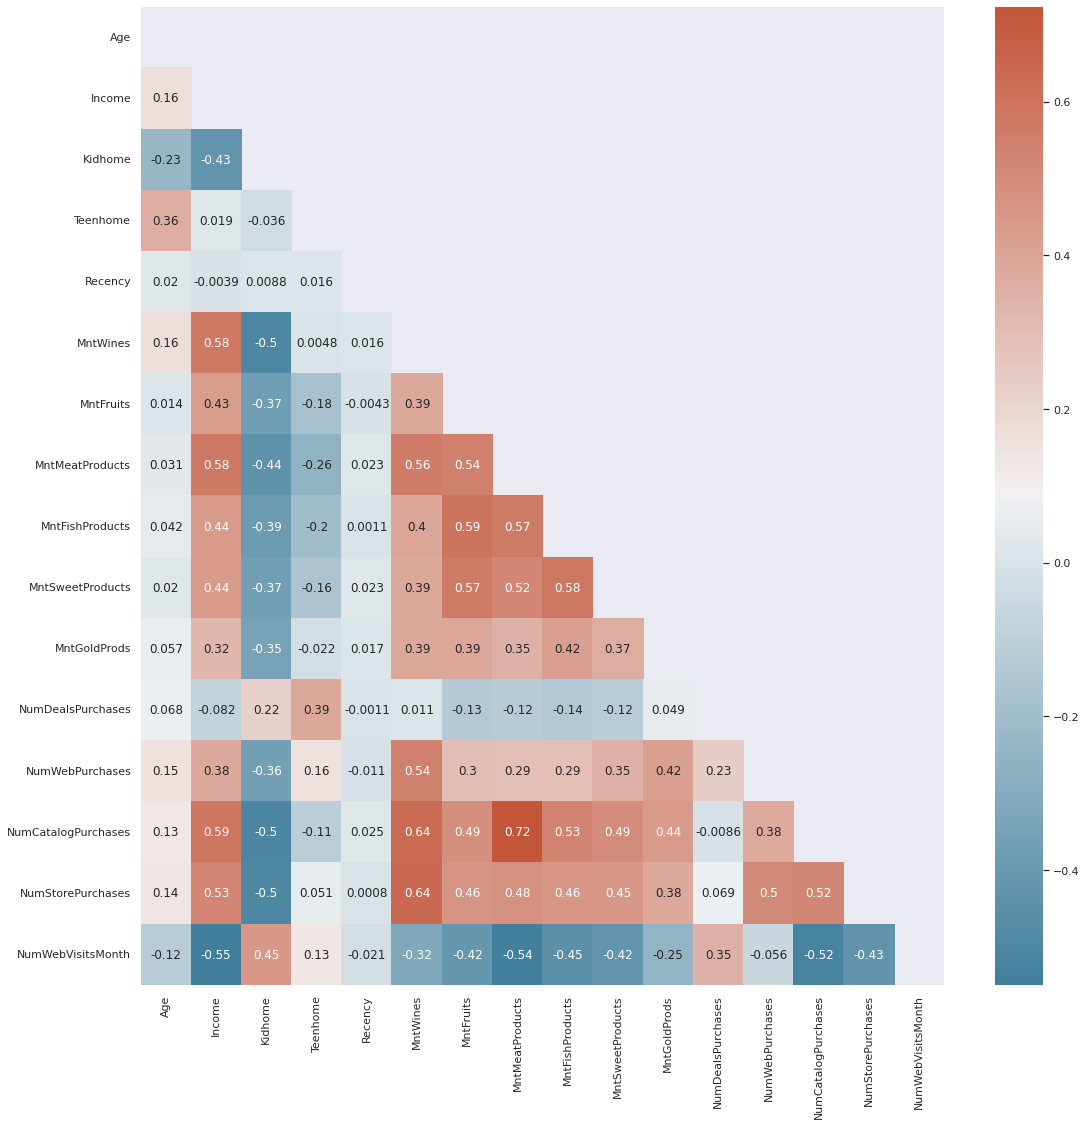

In [27]:
f, ax = plt.subplots(figsize=(18, 18))
mask = np.triu(np.ones_like(numerical_data.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(numerical_data.corr(), annot=True, mask = mask, cmap=cmap)

The numerical features do not present linearity.